In [202]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=[0])
df.set_index('date',inplace=True)
df.tail(2)

,value
date,
2019-12-02,220144
2019-12-03,158549


In [204]:
print(df['value'].quantile(0.975))
print(df['value'].quantile(0.025))

177613.075
17876.4


In [205]:
# Filtrar dias en los que la pagina obtuvo vistas por encima o debajo del 2.5%

df_clean=df.drop(df[(df['value']<df['value'].quantile(0.025)) | (df['value']>df['value'].quantile(0.975))].index)
df_clean.head(2)

,value
date,
2016-05-19,19736
2016-05-26,18060


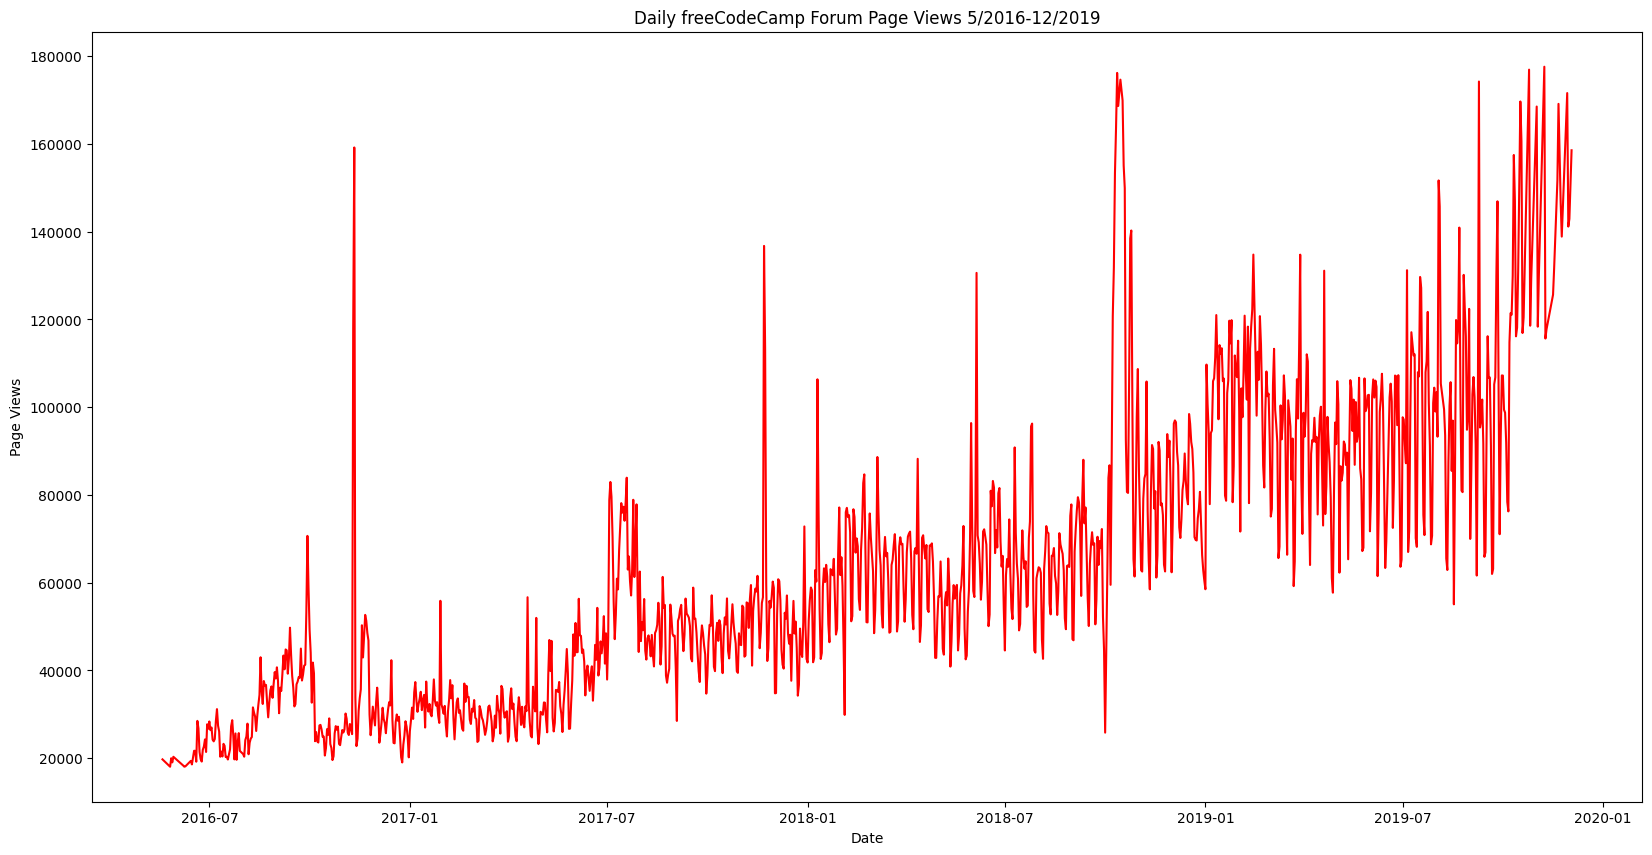

In [206]:
def draw_line_plot():
    x = pd.to_datetime(df_clean.index)
    y = df_clean['value']

    fig,ax = plt.subplots(figsize=(20,10))
    ax.plot(x,y,color='red')

    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=0)
    plt.show()

draw_line_plot()


In [217]:
df_pr =df_clean.copy()
df_pr = df_pr.reset_index()
df_date = df_pr['date'].astype(str).str.split('-',expand=True)
df_pr[['year','month','day']] = df_date

df_pr=df_pr[['year','month','day']].astype(str)

df_plot = df_data.groupby(['year','month']).mean()
df_plot.head(2)


value
year month              
2016 05     19432.400000
     06     21875.105263

TypeError: Axes.bar() missing 1 required positional argument: 'height'

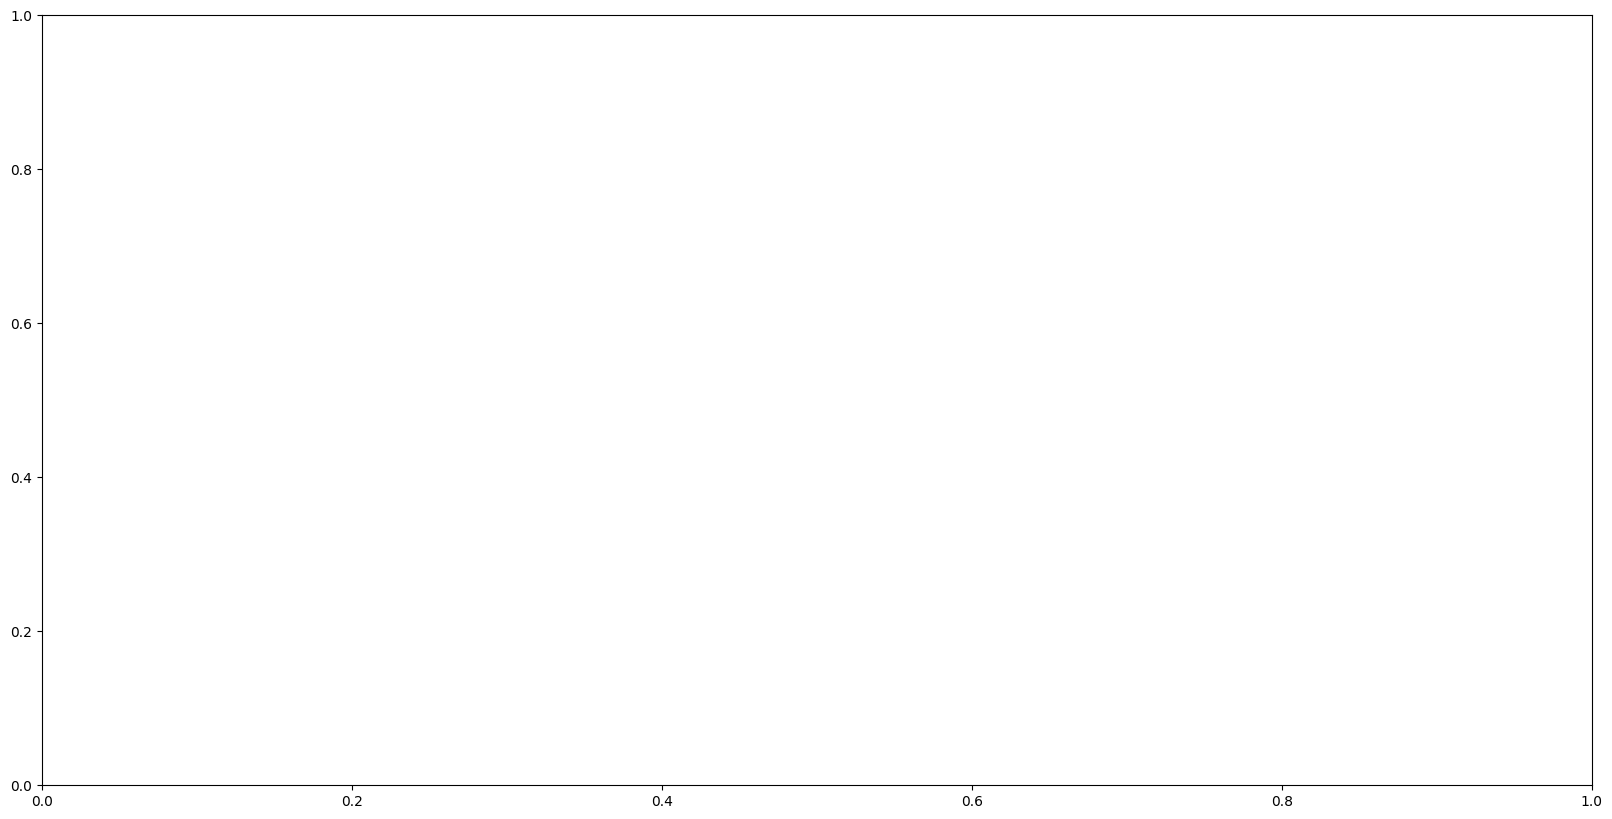

In [212]:
def draw_bar_plot():

    fig,ax = plt.subplots(figsize=(20,10))
    ax.bar(x=df_plot.index,y=df_plot['value'])

    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.xticks(rotation=0)
    plt.show()

draw_bar_plot()
